# Importo i dati

In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import statistics
from scipy.spatial.distance import pdist, squareform
import pygeohash as pgh
import geohash as gh
import geopandas as gpd
from polygon_geohasher.polygon_geohasher import geohash_to_polygon 

In [39]:
year = '2016' #change if needed
csv_folder = '../csv/'+year
df = pd.read_csv(csv_folder+'/df.csv')
df.drop(['Unnamed: 0'], axis='columns', inplace=True)
df

,Screen_name,UserID,TweetID,Coords,Lat,Lon,Created_At,Text
0,madikeeper12,868809325,779072240994234368,"[43.72666207, 10.41268069]",43.726662,10.412681,Thu Sep 22 21:37:51 +0000 2016,Cieli infuocati.\n\n#picoftheday #quotesofthed...
1,madikeeper12,868809325,781615843406819329,"[43.72666207, 10.41268069]",43.726662,10.412681,Thu Sep 29 22:05:13 +0000 2016,Prospettive.. \nunite a casa #ilselfone\n#team...
2,madikeeper12,868809325,781870800156499968,"[43.72666207, 10.41268069]",43.726662,10.412681,Fri Sep 30 14:58:19 +0000 2016,"Non occorre essere matti per lavorare qui, ma ..."
3,madikeeper12,868809325,780003801260404736,"[43.7167, 10.3833]",43.716700,10.383300,Sun Sep 25 11:19:32 +0000 2016,RunOnSunDay 🏃🏽‍♀️☀️\n#run #running #runner #ni...
4,madikeeper12,868809325,779443101123260417,"[43.70561, 10.42059]",43.705610,10.420590,Fri Sep 23 22:11:31 +0000 2016,La vita è come la fotografia sono necessari i ...
...,...,...,...,...,...,...,...,...
656,antoniocassisa,358042635,781879291911016448,"[43.7167, 10.3833]",43.716700,10.383300,Fri Sep 30 15:32:04 +0000 2016,"I mì ómini \n#son #figli #boys @ Pisa, Italy h..."
657,SefaMermer,293157588,780753755830677504,"[43.7167, 10.3833]",43.716700,10.383300,Tue Sep 27 12:59:35 +0000 2016,#love #tbt #tagforlikes #TFLers #tweegram #pho...
658,SefaMermer,293157588,780756143668953088,"[43.7167, 10.3833]",43.716700,10.383300,Tue Sep 27 13:09:05 +0000 2016,#love #tbt #tagforlikes #TFLers #tweegram #pho...
659,matteluca89,494389053,779638196258811904,"[43.71544235, 10.40051616]",43.715442,10.400516,Sat Sep 24 11:06:45 +0000 2016,Last saturday I went out with my #chinese teac...


#### Creo un dataframe contenente soltanto le coordinate (lat e long unite):

In [5]:
df_coords = df['Coords']
df_coords

0      [43.72666207, 10.41268069]
1      [43.72666207, 10.41268069]
2      [43.72666207, 10.41268069]
3              [43.7167, 10.3833]
4            [43.70561, 10.42059]
                  ...            
656            [43.7167, 10.3833]
657            [43.7167, 10.3833]
658            [43.7167, 10.3833]
659    [43.71544235, 10.40051616]
660           [43.72263, 10.3948]
Name: Coords, Length: 661, dtype: object

# Normalzzo i dati

Creo il dataframe X che contiene soltanto la colonna della lat e della lon e poi normalizzo i dati per il clustering.

In [8]:
X = df[['Lat', 'Lon']]
X_norm = StandardScaler().fit_transform(X)

# Clustering OPTICS

OPTICS è un’evoluzione di dbscan e permette di non specificare il raggio.

In [9]:
# optics 1 clustering
print('#OPTICS 1')

parameters_opt1 = 'min_samples=10, default metric=minkowski'
optics1 = OPTICS(min_samples=10).fit(X_norm) #default metric = minkowski
labels_opt1 = optics1.labels_

hist_opt1, bins_opt1 = np.histogram(labels_opt1, bins=range(-1, len(set(labels_opt1)) + 1))

print ('parameters:', parameters_opt1)
print ('n. clusters:', len(bins_opt1))
print ('biggest cluster dimension:', max(hist_opt1))
print ('silhouette:', metrics.silhouette_score(X_norm, labels_opt1))
print ('mean cluster dimension:', statistics.mean(hist_opt1))
print ('median cluster dimension:', statistics.median(hist_opt1))
print ('% outliers:', dict(zip(bins_opt1, hist_opt1))[-1]*100/sum(hist_opt1))

#OPTICS 1
parameters: min_samples=10, default metric=minkowski
n. clusters: 17
biggest cluster dimension: 163
silhouette: 0.6158007360272141
mean cluster dimension: 41
median cluster dimension: 16.0
% outliers: 19.969742813918305


/Users/ariannalisi/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


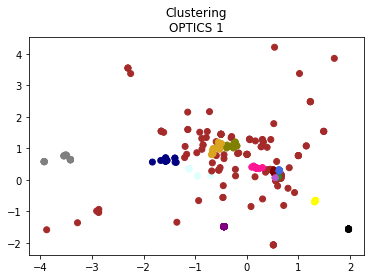

In [10]:
# PLOT OPTICS 1
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'yellow', 'purple', 'black', 'grey', 'red', 'brown']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(X_norm[:,0], X_norm[:,1], c=vectorizer(labels_opt1), marker="o", picker=True)
plt.title('Clustering\nOPTICS 1')
plt.show()

In [11]:
# optics 2 clustering
print('#OPTICS 2')
       
parameters_opt2 = 'min_samples=50, xi=0.05, min_cluuster_size=0.05'
optics2 = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05).fit(X_norm) #default metric = minkowski
labels_opt2 = optics2.labels_

hist_opt2, bins_opt2 = np.histogram(labels_opt2, bins=range(-1, len(set(labels_opt2)) + 1))

print ('parameters:', parameters_opt2)
print ('n. clusters:', len(bins_opt2))
print ('biggest cluster dimension:', max(hist_opt2))
print ('silhouette:', metrics.silhouette_score(X_norm, labels_opt2))
print ('mean cluster dimension:', statistics.mean(hist_opt2))
print ('median cluster dimension:', statistics.median(hist_opt2))
print ('% outliers:', dict(zip(bins_opt2, hist_opt2))[-1]*100/sum(hist_opt2))

#OPTICS 2
parameters: min_samples=50, xi=0.05, min_cluuster_size=0.05
n. clusters: 8
biggest cluster dimension: 167
silhouette: 0.528665768490786
mean cluster dimension: 94
median cluster dimension: 80
% outliers: 25.264750378214828


/Users/ariannalisi/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


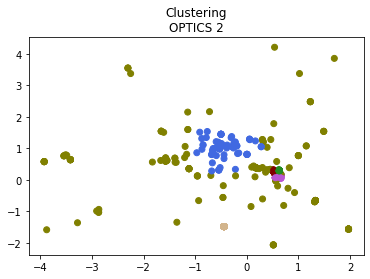

In [12]:
# PLOT OPTICS 2
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(X_norm[:,0], X_norm[:,1], c=vectorizer(labels_opt2), marker="o", picker=True)
plt.title('Clustering\nOPTICS 2')
plt.show()

In [13]:
# optics 3 clustering
print('#OPTICS 3')

parameters_opt3 = 'min_samples=10, metric=cityblock'
optics3 = OPTICS(min_samples=10, metric='cityblock').fit(X_norm)
labels_opt3 = optics3.labels_

hist_opt3, bins_opt3 = np.histogram(labels_opt1, bins=range(-1, len(set(labels_opt1)) + 1))

print ('parameters:', parameters_opt3)
print ('n. clusters:', len(bins_opt3))
print ('biggest cluster dimension:', max(hist_opt3))
print ('silhouette:', metrics.silhouette_score(X_norm, labels_opt1))
print ('mean cluster dimension:', statistics.mean(hist_opt3))
print ('median cluster dimension:', statistics.median(hist_opt3))
print ('% outliers:', dict(zip(bins_opt3, hist_opt3))[-1]*100/sum(hist_opt3))

#OPTICS 3
parameters: min_samples=10, metric=cityblock
n. clusters: 17
biggest cluster dimension: 163
silhouette: 0.6158007360272141
mean cluster dimension: 41
median cluster dimension: 16.0
% outliers: 19.969742813918305


/Users/ariannalisi/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


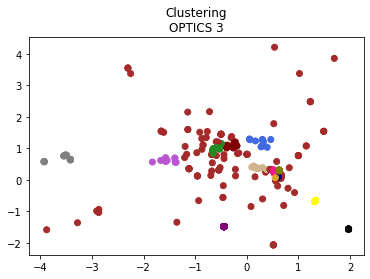

In [14]:
# PLOT OPTICS 3
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'yellow', 'purple', 'black', 'grey', 'red', 'brown']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(X_norm[:,0], X_norm[:,1], c=vectorizer(labels_opt3), marker="o", picker=True)
plt.title('Clustering\nOPTICS 3')
plt.show()

In [42]:
X_optics1 = X.copy() # creo un nuovo dataframe per aggiungere le lables ottenute dal clustering con optics1
labels_optics1 = labels_opt1 #per praticità
X_optics1.insert(2, "Labels", labels_optics1, True)
X_optics1.sort_values(by=['Labels'])
X_optics1

,Lat,Lon,Labels
0,43.726662,10.412681,-1
1,43.726662,10.412681,-1
2,43.726662,10.412681,-1
3,43.716700,10.383300,11
4,43.705610,10.420590,-1
...,...,...,...
656,43.716700,10.383300,11
657,43.716700,10.383300,11
658,43.716700,10.383300,11
659,43.715442,10.400516,7


## Tentativi su grafico per OPTICS (FORSE LO TOLGO)
Preso da https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html.
Continua a studiare il codice e a modificarlo per perfezionare i risultati!

In [16]:
'''
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

labels_050 = cluster_optics_dbscan(
    reachability=optics1.reachability_,
    core_distances=optics1.core_distances_,
    ordering=optics1.ordering_,
    eps=0.5,
)
labels_100 = cluster_optics_dbscan(
    reachability=optics1.reachability_,
    core_distances=optics1.core_distances_,
    ordering=optics1.ordering_,
    eps=1,
)

#np.arange => returns evenly spaced values within a given interval.
#Values are generated within the half-open interval [start, stop) 
#(in other words, the interval including start but excluding stop). 
#For integer arguments the function is equivalent to the Python built-in range function, 
#but returns an ndarray rather than a list.
space = np.arange(len(X_norm))
reachability = optics1.reachability_[optics1.ordering_]
labels_opt = optics1.labels_[optics1.ordering_]

plt.figure(figsize=(10, 10))
G = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, :])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels_opt == klass]
    Rk = reachability[labels_opt == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels_opt == -1], reachability[labels_opt == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 1.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X_norm[optics1.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X_norm[optics1.labels_ == -1, 0], X_norm[optics1.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")
'''

'\nfrom sklearn.cluster import OPTICS, cluster_optics_dbscan\nimport matplotlib.gridspec as gridspec\nimport matplotlib.pyplot as plt\nimport numpy as np\n\nlabels_050 = cluster_optics_dbscan(\n    reachability=optics1.reachability_,\n    core_distances=optics1.core_distances_,\n    ordering=optics1.ordering_,\n    eps=0.5,\n)\nlabels_100 = cluster_optics_dbscan(\n    reachability=optics1.reachability_,\n    core_distances=optics1.core_distances_,\n    ordering=optics1.ordering_,\n    eps=1,\n)\n\n#np.arange => returns evenly spaced values within a given interval.\n#Values are generated within the half-open interval [start, stop) \n#(in other words, the interval including start but excluding stop). \n#For integer arguments the function is equivalent to the Python built-in range function, \n#but returns an ndarray rather than a list.\nspace = np.arange(len(X_norm))\nreachability = optics1.reachability_[optics1.ordering_]\nlabels_opt = optics1.labels_[optics1.ordering_]\n\nplt.figure(fig

### Lavoro su OPTICS 1: tolgo i dati con labels -1 che sono i noise points e quindi non ci interessano.

In [21]:
'''
X_optics1_cleaned = X_optics1.drop(X_optics1[X_optics1['Labels'] == -1].index)
X_optics1_cleaned.sort_values(by=['Labels'])

X_optics1_cleaned_norm = StandardScaler().fit_transform(X_optics1_cleaned)
X_optics1_cleaned_norm

# optics1 cleaned clustering
print ('optics 1 cleaned (without noise)')

optics1.fit(X_optics1_cleaned_norm)
labels_optics1_cleaned = optics1.labels_

hist, bins = np.histogram(labels_optics1_cleaned, bins=range(-1, len(set(labels_optics1_cleaned)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', metrics.silhouette_score(X_optics1_cleaned_norm, labels_optics1_cleaned))
print ('mean cluster dimension', statistics.mean(hist))
print ('median cluster dimension', statistics.median(hist))

# plot optics cleaned 1

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'yellow', 'purple', 'black', 'grey', 'red']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(X_optics1_cleaned_norm[:,0], X_optics1_cleaned_norm[:,1], c=vectorizer(labels_optics1_cleaned))
plt.title('Clustering\nOPTICS 1 Cleaned')
plt.show()
'''

"\nX_optics1_cleaned = X_optics1.drop(X_optics1[X_optics1['Labels'] == -1].index)\nX_optics1_cleaned.sort_values(by=['Labels'])\n\nX_optics1_cleaned_norm = StandardScaler().fit_transform(X_optics1_cleaned)\nX_optics1_cleaned_norm\n\n# optics1 cleaned clustering\nprint ('optics 1 cleaned (without noise)')\n\noptics1.fit(X_optics1_cleaned_norm)\nlabels_optics1_cleaned = optics1.labels_\n\nhist, bins = np.histogram(labels_optics1_cleaned, bins=range(-1, len(set(labels_optics1_cleaned)) + 1))\n\nprint ('labels', dict(zip(bins, hist)))\nprint ('silhouette', metrics.silhouette_score(X_optics1_cleaned_norm, labels_optics1_cleaned))\nprint ('mean cluster dimension', statistics.mean(hist))\nprint ('median cluster dimension', statistics.median(hist))\n\n# plot optics cleaned 1\n\ncolors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'yellow', 'purple', 'black', 'grey', 'red']\nvectorizer = np.vectorize(lambda x: colors[x % l

## Visualizzo i clusters sulla mappa con folium

In [18]:
import folium
from folium import plugins

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

lat = [43.7359, 43.6955]
lon = [10.4269, 10.3686]

lat_mean = np.mean(lat)
lon_mean = np.mean(lon)

lat, lng = (lat_mean, lon_mean)

In [25]:
map_clusters1 = folium.Map(location=[lat, lng], zoom_start=13.3)

# set color scheme for the clusters
x = np.arange(15)
ys = [i + x + (i*x)**2 for i in range(15)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors1 = []
for lat, lng, cluster in zip(X_optics1['Lat'], X_optics1['Lon'],  
                                            X_optics1['Labels']):
    #label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        tooltip = 'Cluster ' + str(cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters1)

print('Map with Optics 1 - '+year)
map_clusters1

Map with Optics 1 - 2016


# DBSCAN

## Knee method with Nearest Neighbors

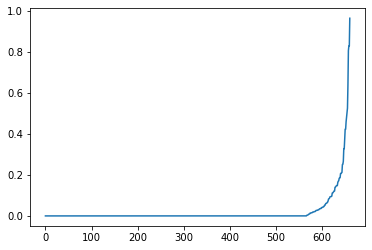

In [28]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_norm)
# .kneighbors finds the K-neighbors of a point and returns indices of and distances to the neighbors of each point.
distances, indices = nbrs.kneighbors(X_norm) 
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Sembrerebbe essere intorno a eps=0.2

## Knee method with pair wise distances between observations in n-dimensional space

Utilizzo il knee method per trovare i parametri più adatti.

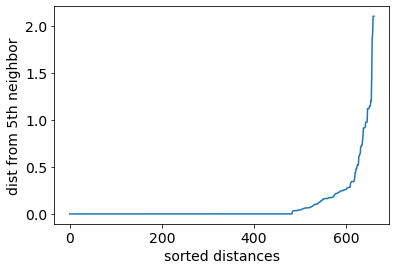

In [31]:
distance = pdist(X_norm, 'euclidean') #pair wise distances between observations in n-dimensional space
#squareform converts between condensed distance matrices and square distance matrices
distance = squareform(distance) #distance matrix given the vector distance 
k = 5
kth_distances = list()
for d in distance:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=14)
plt.xlabel('sorted distances', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

Sembrerebbe essere intorno a eps=0.2 o 0.3

## Prove Clustering

In [32]:
# prova 1: density based clustering
print('#DBSCAN 1')

parameters_ds1 = 'eps=0.2, min_samples=5'
dbscan1 = DBSCAN(eps=0.2, min_samples=5)
dbscan1.fit(X_norm)
labels_dbscan1 = dbscan1.labels_

hist_ds1, bins_ds1 = np.histogram(labels_dbscan1, bins=range(-1, len(set(labels_dbscan1)) + 1))

print ('parameters:', parameters_ds1)
print ('n. clusters:', len(bins_ds1))
print ('biggest cluster dimension:', max(hist_ds1))
print ('silhouette:', metrics.silhouette_score(X_norm, labels_dbscan1))
print ('mean cluster dimension:', statistics.mean(hist_ds1))
print ('median cluster dimension:', statistics.median(hist_ds1))
print ('% outliers:', dict(zip(bins_ds1, hist_ds1))[-1]*100/sum(hist_ds1))

#DBSCAN 1
parameters: eps=0.2, min_samples=5
n. clusters: 15
biggest cluster dimension: 308
silhouette: 0.6883002735680692
mean cluster dimension: 47
median cluster dimension: 13.0
% outliers: 10.287443267776096


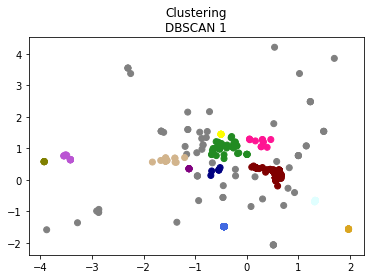

In [33]:
# plot dbscan 1

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'yellow', 'purple', 'black', 'grey']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(X_norm[:,0], X_norm[:,1], c=vectorizer(labels_dbscan1))
plt.title('Clustering\nDBSCAN 1')
plt.show()

In [34]:
# prova 2: density based clustering
print('#DBSCAN 2')

parameters_ds2 = 'eps=0.3, min_samples=5'
dbscan2 = DBSCAN(eps=0.3, min_samples=5)
dbscan2.fit(X_norm)
labels_dbscan2 = dbscan2.labels_

hist_ds2, bins_ds2 = np.histogram(labels_dbscan2, bins=range(-1, len(set(labels_dbscan2)) + 1))

print ('parameters:', parameters_ds2)
print ('n. clusters:', len(bins_ds2))
print ('biggest cluster dimension:', max(hist_ds2))
print ('silhouette:', metrics.silhouette_score(X_norm, labels_dbscan2))
print ('mean cluster dimension:', statistics.mean(hist_ds2))
print ('median cluster dimension:', statistics.median(hist_ds2))
print ('% outliers:', dict(zip(bins_ds2, hist_ds2))[-1]*100/sum(hist_ds2))

#DBSCAN 2
parameters: eps=0.3, min_samples=5
n. clusters: 10
biggest cluster dimension: 312
silhouette: 0.7254384829724049
mean cluster dimension: 73
median cluster dimension: 16
% outliers: 7.2617246596066565


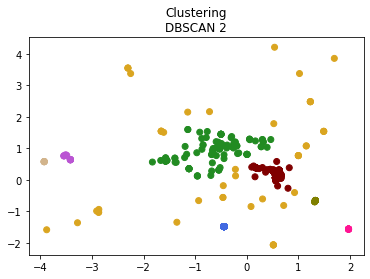

In [35]:
# plot dbscan 2

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(X_norm[:,0], X_norm[:,1], c=vectorizer(labels_dbscan2))
plt.title('Clustering\nDBSCAN 2')
plt.show()

In [36]:
# prova 3: density based clustering
print('#DBSCAN 3')

parameters_ds3 = 'eps=0.2, min_samples=3'
dbscan3 = DBSCAN(eps=0.2, min_samples=3)
dbscan3.fit(X_norm)
labels_dbscan3 = dbscan3.labels_

hist_ds3, bins_ds3 = np.histogram(labels_dbscan3, bins=range(-1, len(set(labels_dbscan3)) + 1))

print ('parameters:', parameters_ds3)
print ('n. clusters:', len(bins_ds3))
print ('biggest cluster dimension:', max(hist_ds3))
print ('silhouette:', metrics.silhouette_score(X_norm, labels_dbscan3))
print ('mean cluster dimension:', statistics.mean(hist_ds3))
print ('median cluster dimension:', statistics.median(hist_ds3))
print ('% outliers:', dict(zip(bins_ds3, hist_ds3))[-1]*100/sum(hist_ds3))

#DBSCAN 3
parameters: eps=0.2, min_samples=3
n. clusters: 25
biggest cluster dimension: 308
silhouette: 0.7369561270838401
mean cluster dimension: 27
median cluster dimension: 6.0
% outliers: 4.387291981845689


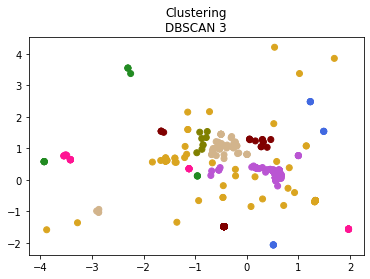

In [37]:
# plot dbscan 3

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(X_norm[:,0], X_norm[:,1], c=vectorizer(labels_dbscan3))
plt.title('Clustering\nDBSCAN 3')
plt.show()

### Salvo il df con le labels del Dbscan1

In [91]:
df_dbscan1 = df.copy()
df_dbscan1.insert(8, "Labels", labels_dbscan1, True)
#saving the dataframe
df_dbscan1.to_csv(csv_folder+'/df_dbscan1.csv')

### Salvo il df con le labels del Dbscan3

In [41]:
df_dbscan3 = df.copy()
df_dbscan3.insert(8, "Labels", labels_dbscan3, True)
#saving the dataframe
df_dbscan3.to_csv(csv_folder+'/df_dbscan3.csv')

In [43]:
X_dbscan1 = X.copy() # creo un nuovo dataframe per aggiungere le lables ottenute dal clustering con dbscan
X_dbscan1.insert(2, "Labels", labels_dbscan1, True)
X_dbscan1

,Lat,Lon,Labels
0,43.726662,10.412681,-1
1,43.726662,10.412681,-1
2,43.726662,10.412681,-1
3,43.716700,10.383300,0
4,43.705610,10.420590,-1
...,...,...,...
656,43.716700,10.383300,0
657,43.716700,10.383300,0
658,43.716700,10.383300,0
659,43.715442,10.400516,2


### Lavoro sul primo DBSCAN: tolgo i dati con labels -1 che sono i noise points e quindi non ci interessano.

In [41]:
'''
X_dbscan1_cleaned = X_dbscan1.drop(X_dbscan1[X_dbscan1['Labels'] == -1].index)
X_dbscan1_cleaned.sort_values(by=['Labels'])

X_dbscan1_cleaned_norm = StandardScaler().fit_transform(X_dbscan1_cleaned)
X_dbscan1_cleaned_norm

# density based clustering
print ('dbscan 1 cleaned (without noise)')

dbscan1.fit(X_dbscan1_cleaned_norm)
labels_dbscan1_cleaned = dbscan1.labels_

hist, bins = np.histogram(labels_dbscan1_cleaned, bins=range(-1, len(set(labels_dbscan1_cleaned)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', metrics.silhouette_score(X_dbscan1_cleaned_norm, labels_dbscan1_cleaned))
print ('mean cluster dimension', statistics.mean(hist))
print ('median cluster dimension', statistics.median(hist))

# plot dbscan cleaned 1

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'yellow', 'purple', 'black', 'grey', 'red']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(X_dbscan1_cleaned_norm[:,0], X_dbscan1_cleaned_norm[:,1], c=vectorizer(labels_dbscan1_cleaned))
plt.title('Clustering\nDBSCAN 1 Cleaned')
plt.show()

X_dbscan1_cleaned["Coords"] = "[" + X_dbscan1_cleaned["Lat"].astype(str) + " , " + X_dbscan1_cleaned["Lon"].astype(str) + "]"
X_dbscan1_cleaned
'''

'\nX_dbscan1_cleaned = X_dbscan1.drop(X_dbscan1[X_dbscan1[\'Labels\'] == -1].index)\nX_dbscan1_cleaned.sort_values(by=[\'Labels\'])\n\nX_dbscan1_cleaned_norm = StandardScaler().fit_transform(X_dbscan1_cleaned)\nX_dbscan1_cleaned_norm\n\n# density based clustering\nprint (\'dbscan 1 cleaned (without noise)\')\n\ndbscan1.fit(X_dbscan1_cleaned_norm)\nlabels_dbscan1_cleaned = dbscan1.labels_\n\nhist, bins = np.histogram(labels_dbscan1_cleaned, bins=range(-1, len(set(labels_dbscan1_cleaned)) + 1))\n\nprint (\'labels\', dict(zip(bins, hist)))\nprint (\'silhouette\', metrics.silhouette_score(X_dbscan1_cleaned_norm, labels_dbscan1_cleaned))\nprint (\'mean cluster dimension\', statistics.mean(hist))\nprint (\'median cluster dimension\', statistics.median(hist))\n\n# plot dbscan cleaned 1\n\ncolors = [\'royalblue\', \'maroon\', \'forestgreen\', \'mediumorchid\', \'tan\', \'deeppink\', \'olive\', \'goldenrod\', \'lightcyan\', \'navy\', \'yellow\', \'purple\', \'black\', \'grey\', \'red\']\nvector

## Visualizzo i clusters sulla mappa con folium

In [68]:
map_clusters3 = folium.Map(location=[lat, lng], zoom_start=13.3)

# set color scheme for the clusters
x = np.arange(15)
ys = [i + x + (i*x)**2 for i in range(15)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, cluster in zip(X_dbscan1['Lat'], X_dbscan1['Lon'],  
                                            X_dbscan1['Labels']):
    #label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        tooltip = 'Cluster ' + str(cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters3)

print('Map with DBSCAN 1 - '+year)
map_clusters3

Map with DBSCAN 1 - 2016


# Bisecting-Kmeans

In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics

In [52]:
%load_ext autoreload
%autoreload 2

from bisecting_kmeans import BisectingKMeans

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
X_bk = df[['Lat', 'Lon']].copy()
X_geo = np.array(X_bk.values.tolist())

max_distance_thr = 100 # meters
max_distance_thr = max_distance_thr / 1000 # kilometers

bkmeans = BisectingKMeans(min_cluster_size=1, max_distance_thr=max_distance_thr, metric='haversine', random_state=0)
bkmeans.fit(X_geo)

In [55]:
values_bk, counts_bk = np.unique(bkmeans.labels_, return_counts=True)

In [56]:
values_bk

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51])

In [57]:
counts_bk

array([ 15,   3,  11,   3,   4,  66,   3,   6,   4,   3,  53,   7,   2,
         3,   6,   3,   4, 138,   2,   2,   5,   2,  11,   4,   4,   2,
         3,  16,   9,   5,   2,   3,  13,   4,   3,   4,  14,   2,   2,
        12,   3,   4,   7,   2,   4,   2,   3, 163,   2,   2,   4,   4,
         3])

In [58]:
import statistics
print('#BKMEANS')

parameters_bk = 'min_cluster_size=1, max_distance_thr=100/1000 (km), metric=haversine, random_state=0'

print ('parameters:', parameters_bk)
print ('n. clusters:', len(values_bk))
print ('biggest cluster dimension:', max(counts_bk))
print ('silhouette:', metrics.silhouette_score(X_geo, bkmeans.labels_, metric='euclidean'))
print ('mean cluster dimension:', statistics.mean(counts_bk))
print ('median cluster dimension:', statistics.median(counts_bk))
print ('% outliers:', 16*100/sum(counts_bk))

#BKMEANS
parameters: min_cluster_size=1, max_distance_thr=100/1000 (km), metric=haversine, random_state=0
n. clusters: 53
biggest cluster dimension: 163
silhouette: 0.803241569685739
mean cluster dimension: 12
median cluster dimension: 4
% outliers: 2.4205748865355523


In [73]:
#possibili analisi/stampe

#bkmeans.labels_
#bkmeans.cluster_centers_
#bkmeans.sse_
#metrics.silhouette_score(X_geo, bkmeans.labels_, metric='euclidean')
#bkmeans.sse_list_

In [63]:
%matplotlib inline

import matplotlib.pyplot as plt

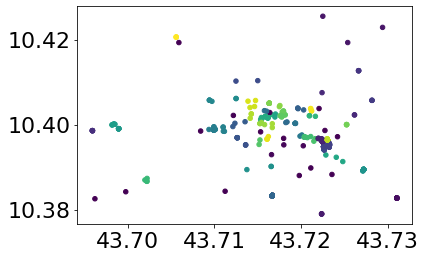

In [64]:
plt.scatter(X_geo[:,0], X_geo[:,1], c=bkmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Visualizzo i clusters sulla mappa con folium

In [67]:
mappa = folium.Map(location=[lat, lng], zoom_start=13.3)

# set color scheme for the clusters
x = np.arange(44)
ys = [i + x + (i*x)**2 for i in range(len(np.unique(bkmeans.labels_)))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors1 = []
for lat, lng, cluster in zip(X_geo[:,0], X_geo[:,1],  bkmeans.labels_):
    #label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        tooltip = 'Cluster ' + str(cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(mappa)

print('Map with Bisecting-Kmeans - '+year)
mappa

Map with Bisecting-Kmeans - 2016


### Salvo il df con le labels di Bisecting-Kmeans

In [69]:
df_bk = df.copy()
df_bk.insert(8, "Labels", bkmeans.labels_, True)
#saving the dataframe
df_bk.to_csv(csv_folder+'/df_bkmeans.csv')

# GEOHASH

In [74]:
X_geohash = X.copy()
X_geohash['geohash'] = X_geohash.apply(lambda x: gh.encode(x.Lat, x.Lon, precision=6), axis=1)

Conto i codici geohash per poi creare una mappa e creare la scala:

In [75]:
count_geohash = []
codes_geohash = X_geohash['geohash'].tolist()
codes_geohash.sort()

In [76]:
values = []

for code_geohash in codes_geohash:
    values.append(codes_geohash.count(code_geohash))
    
values_array = np.array(values)

values = set(values_array)
values

{1, 2, 4, 5, 6, 7, 8, 12, 14, 27, 32, 63, 142, 322}

In [77]:
#per ora non uso l'array normalizzato!
'''
norm = np.linalg.norm(values_array)
normal_array = values_array/norm
print(normal_array)
'''

'\nnorm = np.linalg.norm(values_array)\nnormal_array = values_array/norm\nprint(normal_array)\n'

### Understanding tests:

In [78]:
decoded_location = gh.decode(X_geohash['geohash'][0])
decoded_location2 = gh.decode(X_geohash['geohash'][1])

In [79]:
decoded_location

(43.72833251953125, 10.4095458984375)

In [80]:
decoded_location2

(43.72833251953125, 10.4095458984375)

In [81]:
gh.neighbors(X_geohash['geohash'][0])

['spz2u8',
 'spz2v0',
 'spz2sz',
 'spz2sx',
 'spz2tp',
 'spz2uc',
 'spz2u9',
 'spz2v1']

In [82]:
gh.neighbors(X_geohash['geohash'][200])

['spz2sr',
 'spz2sz',
 'spz2sw',
 'spz2sq',
 'spz2sy',
 'spz2u8',
 'spz2u2',
 'spz2ub']

### Creo un dataframe per poi costruire la griglia con i codici geohash sulla mappa folium:

In [83]:
import json
# Create Geo Pandas DataFrame
df_geo = gpd.GeoDataFrame({'location':df_coords.tolist(), 'value': values_array})
df_geo['geohash'] = X_geohash['geohash']
df_geo['geometry'] = df_geo['geohash'].apply(geohash_to_polygon)
df_geo.crs = {'init': 'epsg:4326'}


print('features.properties.geohash')
display(json.loads(df_geo.to_json())['features'][0])
display(df_geo.head())

features.properties.geohash


/Users/ariannalisi/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


{'id': '0',
 'type': 'Feature',
 'properties': {'geohash': 'spz2ub',
  'location': '[43.72666207, 10.41268069]',
  'value': 1},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[10.404052734375, 43.7255859375],
    [10.4150390625, 43.7255859375],
    [10.4150390625, 43.7310791015625],
    [10.404052734375, 43.7310791015625],
    [10.404052734375, 43.7255859375]]]}}

,location,value,geohash,geometry
0,"[43.72666207, 10.41268069]",1,spz2ub,"POLYGON ((10.40405 43.72559, 10.41504 43.72559..."
1,"[43.72666207, 10.41268069]",5,spz2ub,"POLYGON ((10.40405 43.72559, 10.41504 43.72559..."
2,"[43.72666207, 10.41268069]",5,spz2ub,"POLYGON ((10.40405 43.72559, 10.41504 43.72559..."
3,"[43.7167, 10.3833]",5,spz2sq,"POLYGON ((10.38208 43.71460, 10.39307 43.71460..."
4,"[43.70561, 10.42059]",5,spz2th,"POLYGON ((10.41504 43.70361, 10.42603 43.70361..."


In [84]:
m_geohash = folium.Map((lat, lng), zoom_start=13.2)
folium.Choropleth(geo_data=df_geo, 
                  name='choropleth',
                  data=df_geo,
                  columns=['geohash', 'value'],
                  key_on='feature.properties.geohash',
                  fill_color='YlGn',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name='asdf').add_to(m_geohash)
m_geohash

In [85]:
df_geohash = df.copy()
df_geohash.insert(8, "geohash", X_geohash['geohash'] , True)
#saving the dataframe
df_geohash.to_csv(csv_folder+'/df_geohash.csv')

In [86]:
# raggruppo il df in base ai codici geohash per cambiare nome in numeri e renderli più comprensibili
Geohash_codes = df_geohash.groupby(['geohash'])

lista = []
i = 0

for key, items in Geohash_codes:
    df_geohash['geohash'] = df_geohash['geohash'].replace(key, i)
    i = i+1

#saving the dataframe
df_geohash.to_csv(csv_folder+'/df_geohash_to_numbers.csv')

# TABELLA CONFRONTO CLUSTERING

In [88]:
table = pd.DataFrame()

#table=['Algorithm', 'Parameters', 'N. Clusters', 'Perc. Outliers', 
 #                             'Mean (cluster dimension)', 'Median (cluster dimension)', 
  #                            'Biggest cluster dimension', 'Silhouette']

table['Algorithm'] = ['Optics1', 'Optics2', 'Optics3', 
                      'Dbscan1', 'Dbscan2', 'Dbscan3', 'Biisecting-Kmeans']

table['Parameters'] = [parameters_opt1, parameters_opt2, parameters_opt3,
                      parameters_ds1, parameters_ds2, parameters_ds3, parameters_bk]

table['N. Clusters'] = [len(bins_opt1), len(bins_opt2), len(bins_opt3),
                       len(bins_ds1), len(bins_ds2), len(bins_ds3), len(values_bk)]

table['Perc. Outliers'] = [dict(zip(bins_opt1, hist_opt1))[-1]*100/sum(hist_opt1), 
                           dict(zip(bins_opt2, hist_opt2))[-1]*100/sum(hist_opt2), 
                          dict(zip(bins_opt3, hist_opt3))[-1]*100/sum(hist_opt3),
                          dict(zip(bins_ds1, hist_ds1))[-1]*100/sum(hist_ds1),
                          dict(zip(bins_ds2, hist_ds2))[-1]*100/sum(hist_ds2),
                          dict(zip(bins_ds3, hist_ds3))[-1]*100/sum(hist_ds3),
                          16*100/sum(counts_bk)]

table['Mean (cluster dimension)'] = [statistics.mean(hist_opt1), statistics.mean(hist_opt2), statistics.mean(hist_opt3),
                                    statistics.mean(hist_ds1), statistics.mean(hist_ds2), statistics.mean(hist_ds3),
                                    statistics.mean(counts_bk)]

table['Median (cluster dimension)'] = [statistics.median(hist_opt1), statistics.median(hist_opt2), statistics.median(hist_opt3),
                                    statistics.median(hist_ds1), statistics.median(hist_ds2), statistics.median(hist_ds3),
                                    statistics.median(counts_bk)]

table['Biggest cluster dimension'] = [max(hist_opt1), max(hist_opt2), max(hist_opt3),
                                      max(hist_ds1), max(hist_ds2), max(hist_ds3), max(counts_bk)]
table['Silhouette'] = [metrics.silhouette_score(X_norm, labels_optics1),
                      metrics.silhouette_score(X_norm, labels_opt2),
                      metrics.silhouette_score(X_norm, labels_opt3),
                      metrics.silhouette_score(X_norm, labels_dbscan1),
                      metrics.silhouette_score(X_norm, labels_dbscan2),
                      metrics.silhouette_score(X_norm, labels_dbscan3),
                      metrics.silhouette_score(X_geo, bkmeans.labels_, metric='euclidean')]
table

,Algorithm,Parameters,N. Clusters,Perc. Outliers,Mean (cluster dimension),Median (cluster dimension),Biggest cluster dimension,Silhouette
0,Optics1,"min_samples=10, default metric=minkowski",17,19.969743,41,16.0,163,0.615801
1,Optics2,"min_samples=50, xi=0.05, min_cluuster_size=0.05",8,25.264750,94,80.0,167,0.528666
2,Optics3,"min_samples=10, metric=cityblock",17,19.969743,41,16.0,163,0.612266
3,Dbscan1,"eps=0.2, min_samples=5",15,10.287443,47,13.0,308,0.688300
4,Dbscan2,"eps=0.3, min_samples=5",10,7.261725,73,16.0,312,0.725438
5,Dbscan3,"eps=0.2, min_samples=3",25,4.387292,27,6.0,308,0.736956
6,Biisecting-Kmeans,"min_cluster_size=1, max_distance_thr=100/1000 ...",53,2.420575,12,4.0,163,0.803242


### Adding style for highlighting the most significant algorithms

In [89]:
highlight = lambda x: ['background: #f2dbaa' if x.name in [5,6] else '' for i in x]
table = table.style
table = table.hide_index()
table = table.apply(highlight, axis=1)
table

Algorithm,Parameters,N. Clusters,Perc. Outliers,Mean (cluster dimension),Median (cluster dimension),Biggest cluster dimension,Silhouette
Optics1,"min_samples=10, default metric=minkowski",17,19.969743,41,16.000000,163,0.615801
Optics2,"min_samples=50, xi=0.05, min_cluuster_size=0.05",8,25.264750,94,80.000000,167,0.528666
Optics3,"min_samples=10, metric=cityblock",17,19.969743,41,16.000000,163,0.612266
Dbscan1,"eps=0.2, min_samples=5",15,10.287443,47,13.000000,308,0.688300
Dbscan2,"eps=0.3, min_samples=5",10,7.261725,73,16.000000,312,0.725438
Dbscan3,"eps=0.2, min_samples=3",25,4.387292,27,6.000000,308,0.736956
Biisecting-Kmeans,"min_cluster_size=1, max_distance_thr=100/1000 (km), metric=haversine, random_state=0",53,2.420575,12,4.000000,163,0.803242


In [90]:
table.to_excel(csv_folder+'/table_clustering.xlsx') 